In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [8]:
df = pd.read_excel("heart_disease.xlsx")

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [10]:
df.shape

(908, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [12]:
# Summary statistics
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
count,908.000000,908,908,908.000000,908.000000,908,908,908.000000,908,846.000000,908,908,908.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN,4,NaN,3,3,NaN
top,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,reversable defect,NaN
freq,NaN,718,495,NaN,NaN,723,542,NaN,516,NaN,453,362,NaN
mean,53.791850,NaN,NaN,133.430617,201.484581,NaN,NaN,135.957048,NaN,0.891253,NaN,NaN,1.008811
std,9.158031,NaN,NaN,20.401608,112.097949,NaN,NaN,26.804929,NaN,1.093875,NaN,NaN,1.144436
min,29.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,0.000000
25%,47.750000,NaN,NaN,120.000000,176.750000,NaN,NaN,118.000000,NaN,0.000000,NaN,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,224.000000,NaN,NaN,138.000000,NaN,0.500000,NaN,NaN,1.000000
75%,60.000000,NaN,NaN,144.000000,270.000000,NaN,NaN,156.000000,NaN,1.500000,NaN,NaN,2.000000


In [13]:
# Missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

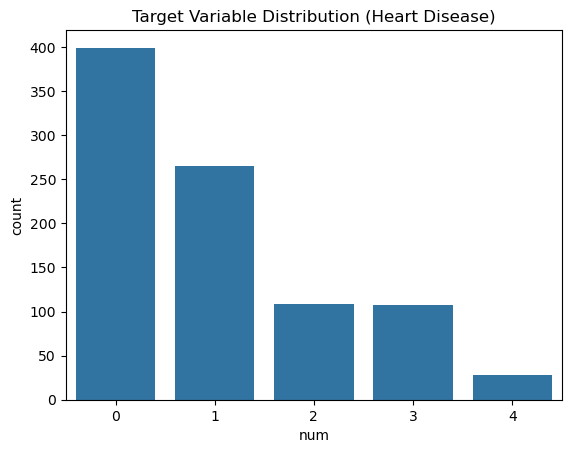

In [14]:
# Target distribution
sns.countplot(x='num', data=df)
plt.title("Target Variable Distribution (Heart Disease)")
plt.show()

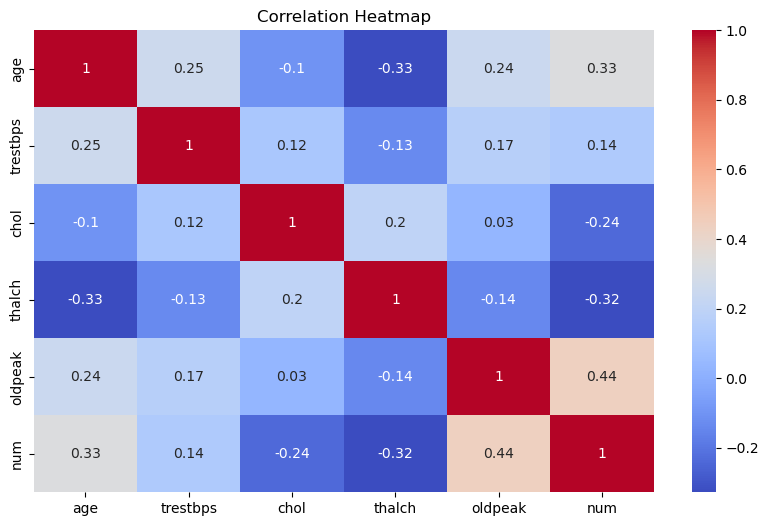

In [15]:
# Correlation heatmap
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

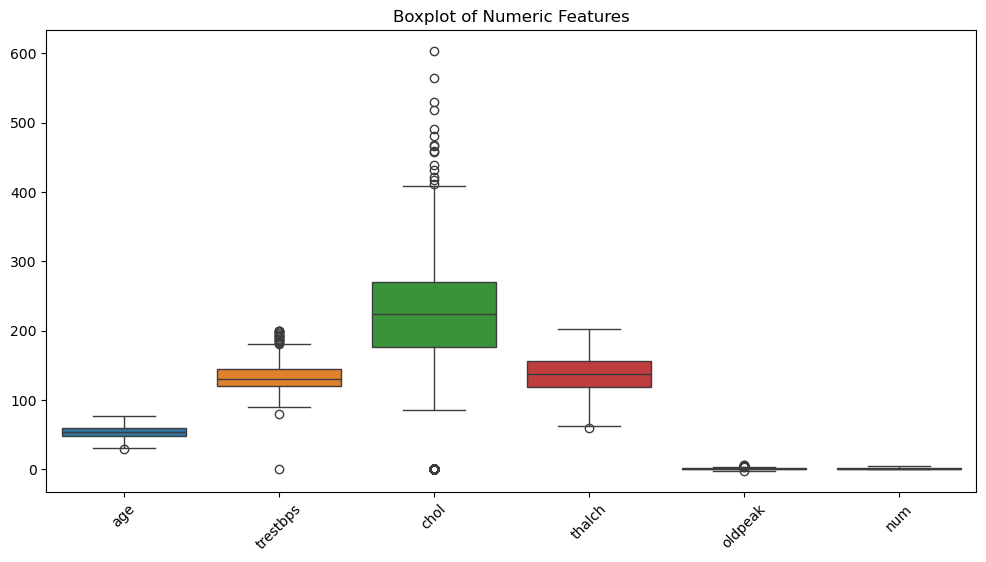

In [16]:
# Boxplot to check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numeric Features")
plt.show()

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.0,0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,False,148,0.4,0,True,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,False,190,0.0,0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.5,0,True,False,False,False,True,False,True,False,False,True,False,False,False


In [18]:
X = df_encoded.drop("num", axis=1)
y = df_encoded["num"]

In [19]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [26]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[58 24  3  4  0]
 [18 19  2  6  3]
 [ 3 11  4  1  3]
 [ 5  5  3  3  1]
 [ 2  3  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66        89
           1       0.31      0.40      0.35        48
           2       0.31      0.18      0.23        22
           3       0.21      0.18      0.19        17
           4       0.00      0.00      0.00         6

    accuracy                           0.46       182
   macro avg       0.30      0.28      0.29       182
weighted avg       0.47      0.46      0.46       182

Accuracy Score: 0.46153846153846156


In [1]:
#1. Common hyperparameters in Decision Trees:

#max_depth: Limits tree size (avoids overfitting).
#min_samples_split: Min samples to split a node.
#min_samples_leaf: Min samples in a leaf.
#max_features: Limits number of features per split.
#criterion: Split quality (e.g., gini, entropy).

In [2]:
#2. Label vs One-Hot Encoding:

#Label Encoding: Converts categories to numbers (good for ordered data).
#One-Hot Encoding: Creates separate binary columns (best for unordered data).